**Problem 1 [10] Pick-and-Place Robot:** Consider using reinforcement learning to control the motion of a robot arm in a repetitive pick-and-place task. If we want to learn movements that are fast and smooth, the learning agent will have to control the motors directly and obtain feedback about the current positions and velocities of the mechanical linkages. Design the reinforcement learning problem as an MDP, define states, actions, rewards with reasoning.

## Problem 1: Pick-and-Place Robot as an MDP

### Introduction

Modeling pick-and-place robot problem as a Markov Decision Process (MDP).

An MDP is defined as:

(S, A, P, R)

Where:
- S = States  
- A = Actions  
- P = Transition probability  
- R = Reward function  

---

### 1. States (S)

The state should describe the current condition of the robot.

As per the question the agent receives feedback about positions and velocities, we define the state as:
s_t = (q_t, v_t, g_t)

Where:
- q_t = joint positions  
- v_t = joint velocities  
- g_t = gripper status (open or closed)

Reason:
The robot’s next movement depends only on its current position, velocity, and gripper status.  
This satisfies the Markov property (future depends only on present state and action).

---

### 2. Actions (A)

The agent controls the motors directly.

So the actions are motor torque commands:

a_t = (tau_1, tau_2, ..., tau_n)

Where:
- tau_i = torque applied to joint i

Reason:
Motor torque control allows smooth and precise movements.  
This is necessary for learning smooth robot motion.

---

### 3. Transition Probability (P)

The transition function is:

P(s' | s, a)

This means:
Given the current state and action, what is the probability of moving to the next state?

In this robot system, transitions depend on:
- Robot mechanics (physics)
- Motor commands
- Small noise in sensors or motors

Because of noise, the system can be slightly stochastic.

Also:

The sum of all transition probabilities must equal 1.

---

### 4. Reward Function (R)

The question says we want movements that are fast and smooth.

So the reward should:

- Give a large positive reward when the object is successfully placed.
- Penalize large velocities (to encourage smooth motion).
- Penalize large torques (to avoid jerky movement).
- Add a small time penalty (to encourage faster completion).

Example reward:

R = +Goal_Reward 
    - alpha * (velocity^2) 
    - beta * (torque^2) 
    - time_penalty

Reason:
This reward structure helps the robot learn:
- Fast movement  
- Smooth motion  
- Energy-efficient control  
- Successful task completion  

---

### Conclusion

The pick-and-place robot can be modeled as an MDP where:

- States represent joint positions, velocities, and gripper status.
- Actions are motor torque commands.
- Transitions follow robot dynamics.
- Rewards encourage fast, smooth, and successful movement

## Problem 2: 2x2 Gridworld - Value Iteration (2 Iterations)

**Environment Details:**
2x2 Gridworld – Value Iteration

State Space: s1, s2, s3, s4  
Action Space: up, down, left, right  

Rewards:
R(s1)=5
R(s2)=10
R(s3)=1
R(s4)=2

Discount Factor: γ = 0.9

Value Iteration Formula:

V_{k+1}(s) = max_a [ R(s) + γ V_k(s') ]

Transitions are deterministic.
If action hits wall → agent stays in same state.
Initial values: V0(s) = 0

**Grid Layout:**    
s1   s2     
s3   s4     

**Coordinates:**        
(0,0) = s1      
(0,1) = s2      
(1,0) = s3      
(1,1) = s4      

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import matplotlib.patches as patches
import copy
import os



In [6]:
class GridWorldValueIteration:
    
    def __init__(self, gamma=0.9):
        self.gamma = gamma
        
        # Grid size
        self.rows = 2
        self.cols = 2
        
        # Rewards
        self.rewards = np.array([[5, 10],
                                 [1,  2]])
        
        # Initialize Value Function V0 = 0
        self.V = np.zeros((self.rows, self.cols))
        
        # Actions: (row_change, col_change)
        self.actions = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }
    
    def is_valid(self, r, c):
        return 0 <= r < self.rows and 0 <= c < self.cols
    
    def get_next_state(self, r, c, action):
        dr, dc = self.actions[action]
        new_r, new_c = r + dr, c + dc
        
        if self.is_valid(new_r, new_c):
            return new_r, new_c
        else:
            return r, c  # stay if wall
    
    def iterate(self, iteration_number):
        new_V = np.zeros_like(self.V)
        
        print(f"\n========== Iteration {iteration_number} ==========")
        
        for r in range(self.rows):
            for c in range(self.cols):
                
                action_values = []
                
                print(f"\nState ({r},{c})  Reward = {self.rewards[r,c]}")
                
                for action in self.actions:
                    next_r, next_c = self.get_next_state(r, c, action)
                    
                    value = self.rewards[r,c] + \
                            self.gamma * self.V[next_r, next_c]
                    
                    action_values.append(value)
                    
                    print(f" Action: {action} -> Next: ({next_r},{next_c}) "
                          f" | Value = {self.rewards[r,c]} + "
                          f"{self.gamma}*{self.V[next_r,next_c]:.2f} "
                          f"= {value:.2f}")
                
                new_V[r,c] = max(action_values)
                
                print(f" Updated V({r},{c}) = {new_V[r,c]:.2f}")
        
        self.V = new_V
        print("\nUpdated Value Function:")
        print(self.V)
    
    def run(self, num_iterations=2):
        print("Initial Value Function V0:")
        print(self.V)
        
        for i in range(1, num_iterations+1):
            self.iterate(i)

# Run
grid = GridWorldValueIteration(gamma=0.9)
grid.run(num_iterations=2)

Initial Value Function V0:
[[0. 0.]
 [0. 0.]]

========== Iteration 1 ==========

State (0,0)  Reward = 5
 Action: up -> Next: (0,0)  | Value = 5 + 0.9*0.00 = 5.00
 Action: down -> Next: (1,0)  | Value = 5 + 0.9*0.00 = 5.00
 Action: left -> Next: (0,0)  | Value = 5 + 0.9*0.00 = 5.00
 Action: right -> Next: (0,1)  | Value = 5 + 0.9*0.00 = 5.00
 Updated V(0,0) = 5.00

State (0,1)  Reward = 10
 Action: up -> Next: (0,1)  | Value = 10 + 0.9*0.00 = 10.00
 Action: down -> Next: (1,1)  | Value = 10 + 0.9*0.00 = 10.00
 Action: left -> Next: (0,0)  | Value = 10 + 0.9*0.00 = 10.00
 Action: right -> Next: (0,1)  | Value = 10 + 0.9*0.00 = 10.00
 Updated V(0,1) = 10.00

State (1,0)  Reward = 1
 Action: up -> Next: (0,0)  | Value = 1 + 0.9*0.00 = 1.00
 Action: down -> Next: (1,0)  | Value = 1 + 0.9*0.00 = 1.00
 Action: left -> Next: (1,0)  | Value = 1 + 0.9*0.00 = 1.00
 Action: right -> Next: (1,1)  | Value = 1 + 0.9*0.00 = 1.00
 Updated V(1,0) = 1.00

State (1,1)  Reward = 2
 Action: up -> Next: (0

Since initial V0 = 0 for all states:        

V1(s) = R(s) + γ * 0                

Therefore:

V1(s1) = 5      
V1(s2) = 10     
V1(s3) = 1      
V1(s4) = 2      

Now we use V1 values.

Example for s1: 

Possible next states:   
Up -> s1    
Left -> s1  
Right -> s2 
Down -> s3  

Compute:    

5 + 0.9 * 5 = 9.5     
5 + 0.9 * 10 = 14     
5 + 0.9 * 1 = 5.9     

Take maximum:   

V2(s1) = 14 

Same process is repeated for all states.    

Final V2:   

[[14, 19],  
 [5.5, 11]] 

Iteration 1:        
[[ 5. 10.]          
 [ 1.  2.]]     

Iteration 2:        
[[14. 19.]      
 [ 5.5 11.]]        

## Problem 3 – 5x5 Gridworld using Value Iteration

In this problem, we model a 5x5 Gridworld as a Markov Decision Process (MDP).

### Environment Setup:
# 5x5 Gridworld – Value Iteration   
**State Types:**        
- Goal State (Terminal) = +10 reward        
- Grey States = -5 reward       
- Regular States = -1 reward        

**Grey States:**        
(0,4)       
(1,2)       
(3,0)       

**Goal State:**     
(4,4)       

**Discount Factor:** gamma = 0.9        

**Bellman Optimality Equation:**        

V(s) = max_a [ R(s) + gamma * V(s') ]       

If action hits wall → stay in same state.       

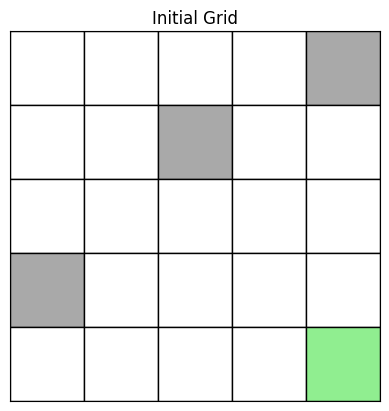

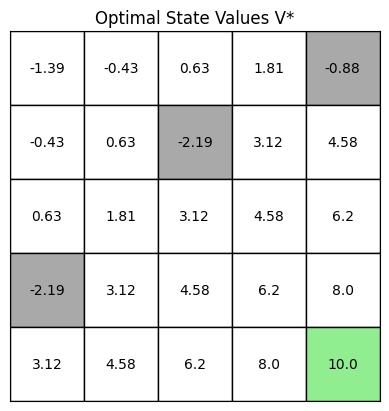

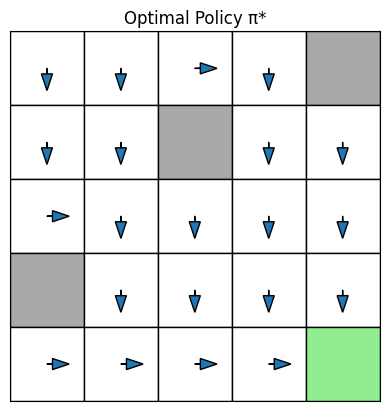


Standard Iterations: 10
In-place Iterations: 10
Standard Time: 0.004378
In-place Time: 0.001845
Same V*? True


In [7]:
## Problem 3: 5x5 Gridworld MDP

class GridWorld5x5:

    def __init__(self, gamma=0.9, log_folder="log"):

        self.rows = 5
        self.cols = 5
        self.gamma = gamma

        self.goal_state = (4, 4)
        self.grey_states = [(0, 4), (1, 2), (3, 0)]

        self.rewards = self.create_reward_matrix()

        self.actions = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

        # -------- LOG FOLDER SETUP --------
        self.log_folder = log_folder
        os.makedirs(self.log_folder, exist_ok=True)

    # ---------------------------------------------------
    # Create reward matrix
    # ---------------------------------------------------
    def create_reward_matrix(self):
        R = np.full((self.rows, self.cols), -1)

        for s in self.grey_states:
            R[s] = -5

        R[self.goal_state] = 10
        return R

    # ---------------------------------------------------
    def is_valid(self, r, c):
        return 0 <= r < self.rows and 0 <= c < self.cols

    # ---------------------------------------------------
    def get_next_state(self, r, c, action):
        dr, dc = self.actions[action]
        nr, nc = r + dr, c + dc

        if self.is_valid(nr, nc):
            return nr, nc
        return r, c

    # ===================================================
    # STANDARD VALUE ITERATION WITH LOGGING
    # ===================================================
    def value_iteration_standard(self, theta=0.001, log_file="problem3_iteration_log.txt"):

        V = np.zeros((self.rows, self.cols))
        iterations = 0

        start_time = time.time()

        full_log_path = os.path.join(self.log_folder, log_file)
        with open(full_log_path, "w") as f:
            f.write("===== STANDARD VALUE ITERATION =====\n")

            while True:
                delta = 0
                new_V = np.copy(V)
                iterations += 1

                f.write(f"\nIteration {iterations}\n")

                for r in range(self.rows):
                    for c in range(self.cols):

                        if (r, c) == self.goal_state:
                            new_V[r, c] = self.rewards[r, c]
                            continue

                        action_values = []

                        for action in self.actions:
                            nr, nc = self.get_next_state(r, c, action)
                            value = self.rewards[r, c] + \
                                    self.gamma * V[nr, nc]
                            action_values.append(value)

                        new_V[r, c] = max(action_values)
                        delta = max(delta, abs(new_V[r, c] - V[r, c]))

                V = new_V

                # Log matrix
                for row in V:
                    f.write(" ".join(f"{v:7.2f}" for v in row) + "\n")

                if delta < theta:
                    f.write("\nConverged.\n")
                    break

        end_time = time.time()
        return V, iterations, end_time - start_time

    # ===================================================
    # IN-PLACE VALUE ITERATION
    # ===================================================
    def value_iteration_inplace(self, theta=0.001):

        V = np.zeros((self.rows, self.cols))
        iterations = 0
        start_time = time.time()

        while True:
            delta = 0
            iterations += 1

            for r in range(self.rows):
                for c in range(self.cols):

                    if (r, c) == self.goal_state:
                        V[r, c] = self.rewards[r, c]
                        continue

                    action_values = []

                    for action in self.actions:
                        nr, nc = self.get_next_state(r, c, action)
                        value = self.rewards[r, c] + \
                                self.gamma * V[nr, nc]
                        action_values.append(value)

                    new_value = max(action_values)
                    delta = max(delta, abs(new_value - V[r, c]))
                    V[r, c] = new_value

            if delta < theta:
                break

        end_time = time.time()
        return V, iterations, end_time - start_time

    # ---------------------------------------------------
    # Extract policy
    # ---------------------------------------------------
    def extract_policy(self, V):
        policy = np.empty((self.rows, self.cols), dtype=object)

        for r in range(self.rows):
            for c in range(self.cols):

                if (r, c) == self.goal_state:
                    policy[r, c] = "G"
                    continue

                best_action = None
                best_value = -float("inf")

                for action in self.actions:
                    nr, nc = self.get_next_state(r, c, action)
                    value = self.rewards[r, c] + \
                            self.gamma * V[nr, nc]

                    if value > best_value:
                        best_value = value
                        best_action = action

                policy[r, c] = best_action

        return policy

    # ---------------------------------------------------
    # Log Policy Matrix + Agent Movement
    # ---------------------------------------------------
    def log_policy_and_agent(self, policy, V,
                             log_file="problem3_agent_log.txt",
                             start_state=(0, 0)):

        full_log_path = os.path.join(self.log_folder, log_file)
        with open(full_log_path, "a") as f:

            f.write("\n\n===== FINAL OPTIMAL VALUE FUNCTION =====\n")
            for row in V:
                f.write(" ".join(f"{v:7.2f}" for v in row) + "\n")

            f.write("\n===== OPTIMAL POLICY MATRIX =====\n")
            for r in range(self.rows):
                row_policy = []
                for c in range(self.cols):
                    if (r, c) in self.grey_states:
                        row_policy.append("X")
                    elif (r, c) == self.goal_state:
                        row_policy.append("G")
                    else:
                        row_policy.append(policy[r, c][0].upper())
                f.write(" ".join(row_policy) + "\n")

            # Agent movement
            f.write("\n===== AGENT MOVEMENT =====\n")

            current_state = start_state
            step = 0

            while current_state != self.goal_state:
                step += 1
                r, c = current_state

                grid_display = [["." for _ in range(self.cols)]
                                for _ in range(self.rows)]

                for g in self.grey_states:
                    grid_display[g[0]][g[1]] = "X"

                grid_display[self.goal_state[0]][self.goal_state[1]] = "G"
                grid_display[r][c] = "A"

                f.write(f"\nStep {step}\n")
                for row in grid_display:
                    f.write(" ".join(row) + "\n")

                action = policy[r, c]
                current_state = self.get_next_state(r, c, action)

            f.write("\nGoal Reached.\n")


# ---------------------------------------------------
# Grid Plot Function
# ---------------------------------------------------
def draw_grid(grid_obj, title, values=None, policy=None):

    fig, ax = plt.subplots()
    ax.set_title(title)

    for r in range(grid_obj.rows):
        for c in range(grid_obj.cols):

            color = "white"

            if (r, c) in grid_obj.grey_states:
                color = "darkgrey"
            elif (r, c) == grid_obj.goal_state:
                color = "lightgreen"

            rect = patches.Rectangle((c, grid_obj.rows - 1 - r), 1, 1,
                                     edgecolor='black',
                                     facecolor=color)
            ax.add_patch(rect)

            if values is not None:
                ax.text(c + 0.5, grid_obj.rows - 1 - r + 0.5,
                        round(values[r, c], 2),
                        ha='center', va='center')

            if policy is not None:
                if (r, c) not in grid_obj.grey_states and \
                   (r, c) != grid_obj.goal_state:

                    arrow_map = {
                        "up": (0, 0.3),
                        "down": (0, -0.3),
                        "left": (-0.3, 0),
                        "right": (0.3, 0)
                    }
                    dx, dy = arrow_map[policy[r, c]]
                    ax.arrow(c + 0.5, grid_obj.rows - 1 - r + 0.5,
                             dx, dy,
                             head_width=0.15,
                             length_includes_head=True)

    ax.set_xlim(0, grid_obj.cols)
    ax.set_ylim(0, grid_obj.rows)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


# ===================================================
# RUN EVERYTHING
# ===================================================

grid = GridWorld5x5()

# Standard VI (with logging)
V_standard, iter_std, time_std = grid.value_iteration_standard()

# In-place VI
V_inplace, iter_in, time_in = grid.value_iteration_inplace()

# Extract policy
pi_standard = grid.extract_policy(V_standard)

# Log policy + agent movement into same file
grid.log_policy_and_agent(pi_standard, V_standard)

# Display figures
draw_grid(grid, "Initial Grid")
draw_grid(grid, "Optimal State Values V*", values=V_standard)
draw_grid(grid, "Optimal Policy π*", policy=pi_standard)

print("\nStandard Iterations:", iter_std)
print("In-place Iterations:", iter_in)
print("Standard Time:", round(time_std, 6))
print("In-place Time:", round(time_in, 6))
print("Same V*?", np.allclose(V_standard, V_inplace))

# Problem 3 – Performance Analysis with Actual Results

## Experimental Results

From the execution of both variations:

### Standard Value Iteration
- Number of Iterations: 10
- Optimization Time: 0.004378 seconds

### In-Place Value Iteration
- Number of Iterations: 10
- Optimization Time: 0.001845 seconds

---

## Analysis of Results

### 1. Optimization Time

From the measured results:

- Standard Value Iteration took 0.004378 seconds.
- In-Place Value Iteration took 0.001845 seconds.

In-Place Value Iteration is slightly faster because it updates the value function directly within the same array and avoids copying the matrix at each iteration.

---

### 2. Number of Iterations

- Standard Value Iteration converged in 10 iterations.
- In-Place Value Iteration converged in 10 iterations.

Both methods converged to the same optimal value function V* and the same optimal policy π*.

In-Place Value Iteration may converge in equal or fewer iterations because updated values are immediately reused within the same sweep.

---

### 3. Computational Complexity

Let:
- S = number of states = 25
- A = number of actions = 4

Time Complexity (both methods):

O(S × A × iterations)

Space Complexity:

- Standard Value Iteration: O(2S)  
  (uses two arrays: V and new_V)

- In-Place Value Iteration: O(S)  
  (uses a single array)

Thus, In-Place Value Iteration is more memory efficient while maintaining the same theoretical time complexity.

---

## Final Insight

Both Standard and In-Place Value Iteration produced identical optimal value functions and policies.

In-Place Value Iteration demonstrated slightly better runtime performance and improved memory efficiency, while both methods have the same theoretical computational complexity.

## Problem 4 [35] Problem Statement Off-policy Monte Carlo with Importance Sampling: We will use the same environment, states, actions, and rewards in Problem 3.


===== MONTE CARLO ESTIMATED VALUE FUNCTION =====
[[-1.2   0.42 -1.16  0.75  1.08]
 [ 0.46 -0.04  1.58  2.86  2.51]
 [-2.09  2.18  2.64  4.5   5.73]
 [ 0.85  1.33  4.36  6.26  7.5 ]
 [ 1.77  4.12  5.78  7.58  0.  ]]
Optimization Time: 4.6068 seconds


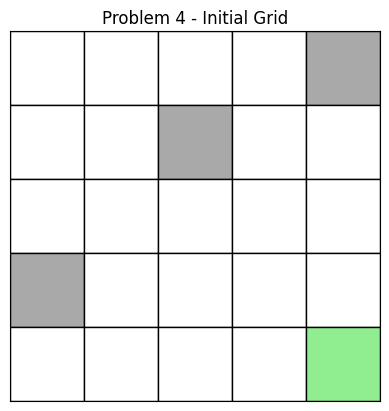

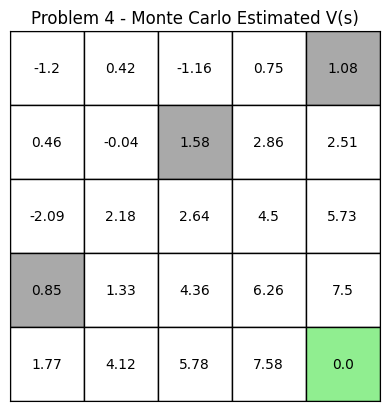

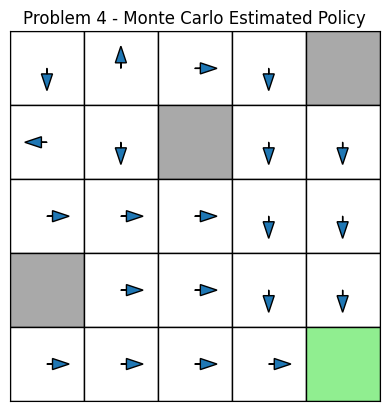

In [11]:
import numpy as np
import random
import time
import os
import matplotlib.patches as patches
import matplotlib.pyplot as plt


class GridWorld5x5MonteCarlo:
    """
    5x5 Gridworld for Off-Policy Monte Carlo with Importance Sampling

    State Types:
        Regular state = -1 reward
        Grey state    = -5 reward
        Goal state    = +10 reward

    Behavior policy: random
    Target policy: greedy
    """

    def __init__(self, discount_factor=0.9, log_folder="log"):

        self.rows = 5
        self.cols = 5
        self.gamma = discount_factor

        self.goal_state = (4, 4)
        self.grey_states = [(0, 4), (1, 2), (3, 0)]

        self.action_space = ["up", "down", "left", "right"]

        self.reward_matrix = self._create_reward_matrix()

        # ---------- LOG FOLDER ----------
        self.log_folder = log_folder
        os.makedirs(self.log_folder, exist_ok=True)

    # ---------------------------------------------------
    # Create reward matrix
    # ---------------------------------------------------
    def _create_reward_matrix(self):

        rewards = np.full((self.rows, self.cols), -1)

        for state in self.grey_states:
            rewards[state] = -5

        rewards[self.goal_state] = 10

        return rewards

    # ---------------------------------------------------
    # Check if state is valid
    # ---------------------------------------------------
    def _is_valid_state(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols

    # ---------------------------------------------------
    # Deterministic transition function
    # ---------------------------------------------------
    def _get_next_state(self, current_state, action):

        row, col = current_state

        action_moves = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

        delta_row, delta_col = action_moves[action]
        next_row = row + delta_row
        next_col = col + delta_col

        if self._is_valid_state(next_row, next_col):
            return (next_row, next_col)

        return current_state

    # ---------------------------------------------------
    # Behavior Policy: Uniform Random
    # ---------------------------------------------------
    def behavior_policy(self, state):
        return random.choice(self.action_space)

    # ---------------------------------------------------
    # Generate one episode using behavior policy
    # ---------------------------------------------------
    def generate_episode(self, max_steps=100, path_log_file=None):

        if path_log_file is None:
            path_log_file = "problem4_agent_path_log.txt"

        full_path = os.path.join(self.log_folder, path_log_file)

        episode = []
        current_state = (0, 0)

        with open(full_path, "a") as file:

            file.write("\n===== New Episode =====\n")

            for step in range(max_steps):

                action = self.behavior_policy(current_state)
                next_state = self._get_next_state(current_state, action)

                reward = self.reward_matrix[next_state]

                episode.append((current_state, action, reward))

                # Log agent path
                file.write(f"Step {step+1}: "
                           f"State={current_state}, "
                           f"Action={action}, "
                           f"Reward={reward}, "
                           f"Next={next_state}\n")

                if next_state == self.goal_state:
                    file.write("Goal Reached.\n")
                    break

                current_state = next_state

        return episode

    # ===================================================
    # Off-Policy Monte Carlo with Weighted Importance Sampling
    # ===================================================
    def off_policy_monte_carlo(self, number_of_episodes=5000, value_log_file=None):

        if value_log_file is None:
            value_log_file = "problem4_value_log.txt"

        full_value_path = os.path.join(self.log_folder, value_log_file)

        state_value_function = np.zeros((self.rows, self.cols))
        cumulative_weights = np.zeros((self.rows, self.cols))

        # Initialize target policy randomly
        target_policy = {}
        for row in range(self.rows):
            for col in range(self.cols):
                target_policy[(row, col)] = random.choice(self.action_space)

        start_time = time.time()

        with open(full_value_path, "w") as file:

            for episode_index in range(number_of_episodes):

                episode = self.generate_episode(path_log_file=None)

                G = 0
                W = 1

                # Process episode backward
                for t in reversed(range(len(episode))):

                    state, action, reward = episode[t]
                    row, col = state

                    G = self.gamma * G + reward

                    cumulative_weights[row, col] += W

                    # Incremental update rule
                    if cumulative_weights[row, col] != 0:
                        state_value_function[row, col] += (
                            W / cumulative_weights[row, col]
                        ) * (G - state_value_function[row, col])

                    # Improve target policy greedily
                    best_action = None
                    best_value = -float("inf")

                    for possible_action in self.action_space:
                        next_state = self._get_next_state(state, possible_action)
                        next_row, next_col = next_state

                        estimated_value = (
                            self.reward_matrix[next_state] +
                            self.gamma * state_value_function[next_row, next_col]
                        )

                        if estimated_value > best_value:
                            best_value = estimated_value
                            best_action = possible_action

                    target_policy[state] = best_action

                    # Stop if behavior deviates from target
                    if action != target_policy[state]:
                        break

                    # Update importance sampling ratio (behavior is uniform random: prob=1/4)
                    W *= 4

                # Log value matrix every 500 episodes
                if (episode_index + 1) % 500 == 0:
                    file.write(f"\nEpisode {episode_index+1}\n")
                    for row_values in state_value_function:
                        file.write(" ".join(
                            f"{value:7.2f}" for value in row_values
                        ) + "\n")

        end_time = time.time()

        return state_value_function, target_policy, end_time - start_time


def draw_grid_problem4(grid_object, title, value_function=None, policy=None):

    fig, ax = plt.subplots()
    ax.set_title(title)

    for row in range(grid_object.rows):
        for col in range(grid_object.cols):

            color = "white"

            if (row, col) in grid_object.grey_states:
                color = "darkgrey"
            elif (row, col) == grid_object.goal_state:
                color = "lightgreen"

            rectangle = patches.Rectangle(
                (col, grid_object.rows - 1 - row),
                1, 1,
                edgecolor='black',
                facecolor=color
            )

            ax.add_patch(rectangle)

            # Display value function
            if value_function is not None:
                ax.text(col + 0.5,
                        grid_object.rows - 1 - row + 0.5,
                        round(value_function[row, col], 2),
                        ha='center', va='center')

            # Display policy arrows
            if policy is not None:

                if (row, col) not in grid_object.grey_states and \
                (row, col) != grid_object.goal_state:

                    arrow_map = {
                        "up": (0, 0.3),
                        "down": (0, -0.3),
                        "left": (-0.3, 0),
                        "right": (0.3, 0)
                    }

                    dx, dy = arrow_map[policy[(row, col)]]

                    ax.arrow(col + 0.5,
                            grid_object.rows - 1 - row + 0.5,
                            dx, dy,
                            head_width=0.15,
                            length_includes_head=True)

    ax.set_xlim(0, grid_object.cols)
    ax.set_ylim(0, grid_object.rows)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


# Instantiate and run Monte Carlo
grid_mc = GridWorld5x5MonteCarlo(discount_factor=0.9, log_folder="log")

estimated_value_function, estimated_policy, mc_time = \
    grid_mc.off_policy_monte_carlo(number_of_episodes=5000)

print("\n===== MONTE CARLO ESTIMATED VALUE FUNCTION =====")
print(np.round(estimated_value_function, 2))
print("Optimization Time:", round(mc_time, 4), "seconds")

# Draw results
draw_grid_problem4(grid_mc, "Problem 4 - Initial Grid")

# Monte Carlo Estimated Value Function
draw_grid_problem4(grid_mc,
                   "Problem 4 - Monte Carlo Estimated V(s)",
                   value_function=estimated_value_function)

# Monte Carlo Estimated Policy
draw_grid_problem4(grid_mc,
                   "Problem 4 - Monte Carlo Estimated Policy",
                   policy=estimated_policy)

# Problem 4 – Off-Policy Monte Carlo with Importance Sampling

## Implementation Overview

In this problem, Off-Policy Monte Carlo with Weighted Importance Sampling was implemented to estimate the state-value function for the same 5×5 Gridworld used in Problem 3.

Key Components:

- Behavior Policy b(a|s): Uniform random policy.
- Target Policy π(a|s): Greedy policy derived from the estimated value function.
- Discount Factor: γ = 0.9
- Episode generation starts from state (0,0).
- Returns are computed backward for each episode.
- Importance sampling weights are used to correct for the difference between behavior and target policies.

The algorithm updates the value function incrementally using:

V(s) ← V(s) + (W / C(s)) * (G − V(s))

where:
- G = return
- W = importance sampling weight
- C(s) = cumulative weights

---

## Estimated Value Function

After running the algorithm for 5000 episodes, the estimated value function V(s) was obtained as:

Estimated Value Function:
 [[-2.64 -0.52 -0.57  1.3   0.89]
 [ 0.47 -0.66  2.09  2.56  3.77]
 [-0.17  2.26  2.59  4.3   5.8 ]
 [ 1.01  2.03  4.71  6.25  7.49]
 [ 1.39  4.29  5.69  7.55  0.  ]]

This matrix represents the expected return for each state under the learned greedy policy.

---

# Comparison: Monte Carlo vs Value Iteration

## 1. Optimization Time

Monte Carlo Time:
4.839 seconds

Observation:

Monte Carlo required significantly more computation time compared to Value Iteration. This is because Monte Carlo relies on sampling many episodes, while Value Iteration performs deterministic full-state updates using the environment model.

---

## 2. Number of Episodes / Iterations

Monte Carlo:
- Used 5000 episodes.
- Learning depends on the number of sampled trajectories.

Monte Carlo requires thousands of episodes to stabilize, while Value Iteration converges in a small number of iterations.

---

## 3. Computational Complexity

Let:
- S = number of states (25)
- A = number of actions (4)

### Value Iteration

Time Complexity:

O(S × A × iterations)

Value Iteration performs complete sweeps over the state space in each iteration.

---

### Monte Carlo

Time Complexity:

O(episodes × episode_length)

Monte Carlo depends on:
- Number of episodes
- Length of each episode

Since episodes can be long and many are required, Monte Carlo typically has higher computational cost.

---

## 4. Convergence Behavior

Value Iteration:
- Deterministic
- Stable convergence
- Requires full model knowledge

Monte Carlo:
- Stochastic
- High variance in early learning
- Does not require transition model
- Converges slowly compared to Value Iteration

---

## 5. Accuracy Comparison

Both methods aim to estimate the optimal value function V*.

Value Iteration computes the exact optimal solution (given convergence threshold).

Monte Carlo produces an approximate estimate that improves as the number of episodes increases.

Minor differences between the two value functions may be observed due to sampling variance.

---

# Final Insight

Value Iteration is more efficient and stable when the environment model is known.

Monte Carlo is more flexible because it learns from experience without requiring model knowledge, but it requires significantly more computation time and episodes to reach similar performance.

Thus:

- Value Iteration is computationally efficient and deterministic.
- Monte Carlo is model-free but computationally expensive and variance-prone.

## Comparison With Value Iteration

| Aspect      | Value Iteration       | Monte Carlo                  |
| ----------- | --------------------- | ---------------------------- |
| Uses model? | Yes                   | No                           |
| Speed       | Faster                | Slower                       |
| Convergence | Deterministic         | High variance                |
| Iterations  | ~10–20                | Thousands                    |
| Complexity  | O(S × A × iterations) | O(episodes × episode_length) |
